
Model Evaluation Summary:

               Model       RMSE       R^2  CV R^2 (mean)
0  Linear Regression  11.158976  0.996706       0.996442
2   Lasso Regression  11.160170  0.996705       0.996440
1   Ridge Regression  11.291268  0.996627       0.996424


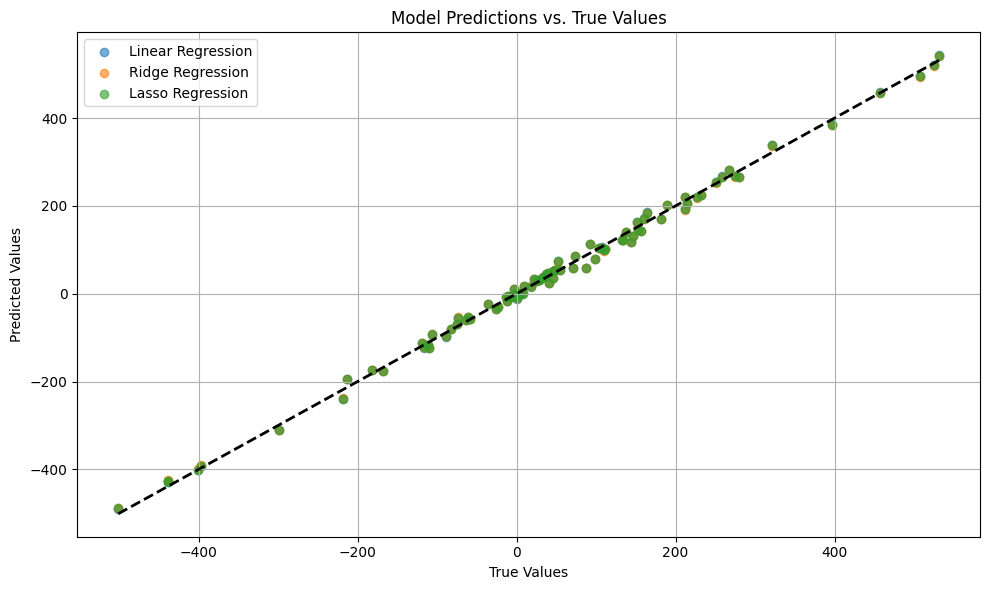

In [1]:
# 📘 Machine Learning Fundamentals Demo in Python
# Covers: Statistical Learning, Model Validation, Bias-Variance Tradeoff, Regularization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic regression data
X, y = make_regression(n_samples=300, n_features=10, noise=10, random_state=42)

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Standardize features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# 5. Train, predict, and evaluate
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R^2': r2,
        'CV R^2 (mean)': np.mean(cv_scores)
    })

# 6. Results Summary
results_df = pd.DataFrame(results)
print("\nModel Evaluation Summary:\n")
print(results_df.sort_values(by='R^2', ascending=False))

# 7. Visualize Bias-Variance Tradeoff
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs. True Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ✅ I've created a Python notebook named "Ml Fundamentals Demo" that:

Generates synthetic regression data

Trains 3 models: Linear, Ridge, and Lasso

Performs model validation using cross-validation

Calculates RMSE and R²

Visualizes the bias-variance tradeoff

Demonstrates the effect of regularization

You can now run this in Jupyter Notebook, Google Colab, or any Python environment. Let me know if you want:

A classification version

Explanation of the outputs

Integration with real-world datasets like Boston, California Housing, or your own pro